In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colormaps as cm
%matplotlib inline

In [2]:
ds_tor = xr.open_dataset('./pper_datasets/pper_tor_1979_2023.nc')
ds_wind = xr.open_dataset('./pper_datasets/pper_wind_1979_2023.nc')
ds_hail = xr.open_dataset('./pper_datasets/pper_hail_1979_2023.nc')

ds_tor_sig = xr.open_dataset('./pper_datasets/pper_sig_tor_1979_2023.nc')
ds_wind_sig = xr.open_dataset('./pper_datasets/pper_sig_wind_1979_2023.nc')
ds_hail_sig = xr.open_dataset('./pper_datasets/pper_sig_hail_1979_2023.nc')

ds_tor_sig.p_perfect_sig_tor.min()

<xarray.DataArray 'p_perfect_sig_tor' ()> Size: 8B
array(0.)

In [3]:
time_sel = '2013-05-31'

ds_tor_sel = ds_tor.sel(time= time_sel, method= 'nearest')
ds_wind_sel = ds_wind.sel(time= time_sel, method= 'nearest')
ds_hail_sel = ds_hail.sel(time= time_sel, method= 'nearest')

ds_tor_sig_sel = ds_tor_sig.sel(time= time_sel, method= 'nearest')
ds_wind_sig_sel = ds_wind_sig.sel(time= time_sel, method= 'nearest')
ds_hail_sig_sel = ds_hail_sig.sel(time= time_sel, method= 'nearest')


ds_tor_mask = ds_tor_sel.where(ds_tor_sel.p_perfect_tor >= 1)
ds_wind_mask = ds_wind_sel.where(ds_wind_sel.p_perfect_wind >= 1)
ds_hail_mask = ds_hail_sel.where(ds_hail_sel.p_perfect_hail >= 1)

ds_tor_sig_mask = ds_tor_sig_sel.where(ds_tor_sig_sel.p_perfect_sig_tor >= 1)
ds_wind_sig_mask = ds_wind_sig_sel.where(ds_wind_sig_sel.p_perfect_sig_wind >= 1)
ds_hail_sig_mask = ds_hail_sig_sel.where(ds_hail_sig_sel.p_perfect_sig_hail >= 1)

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


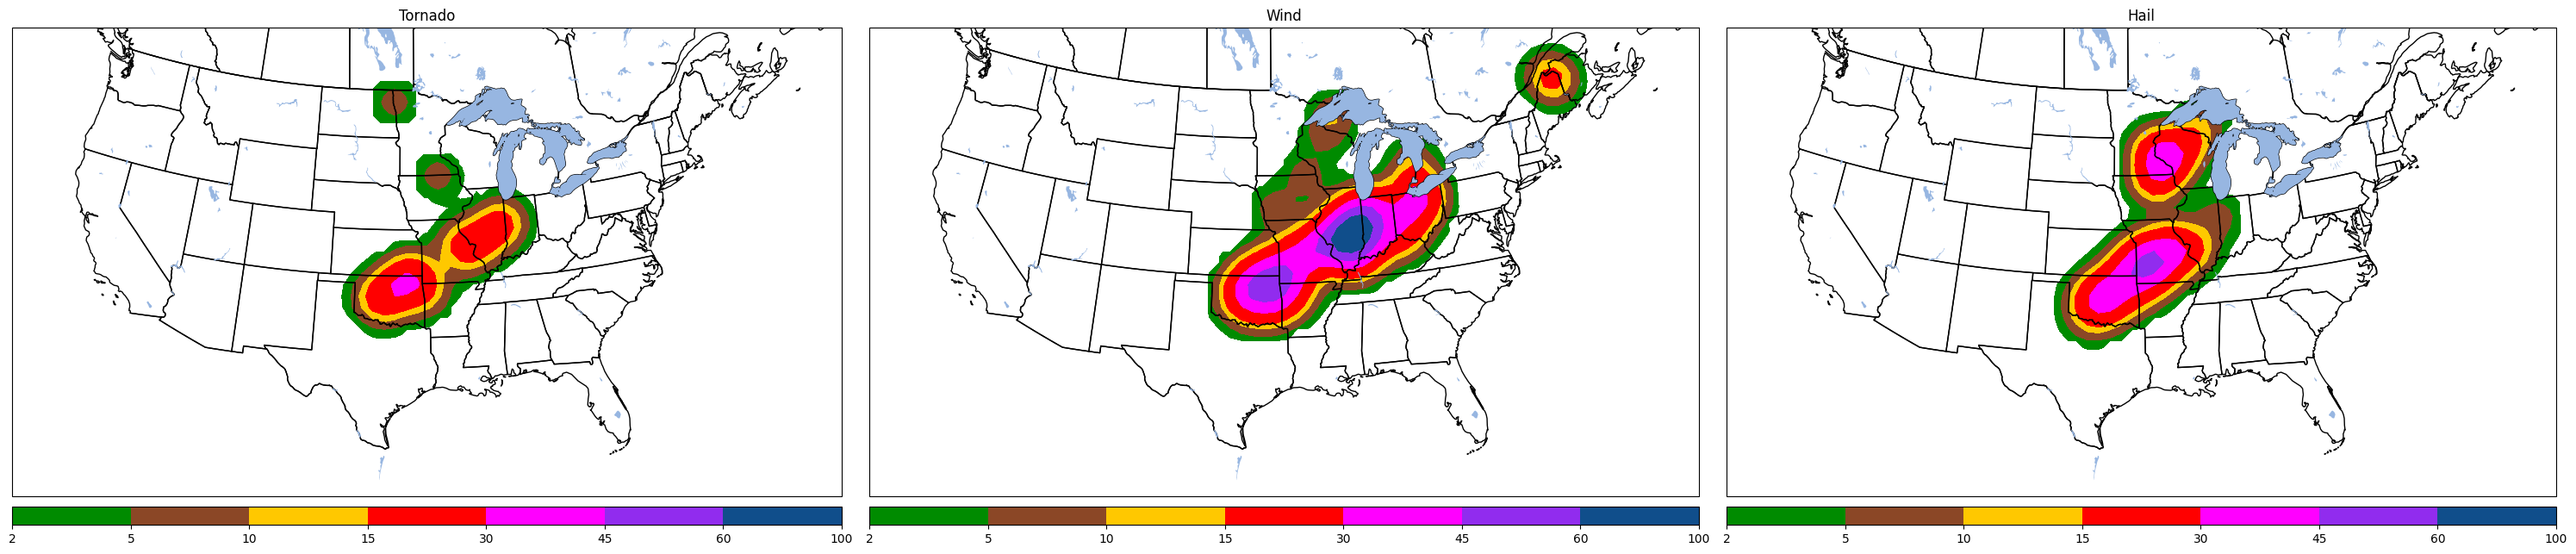

In [4]:
colors = ['#008b00','#8b4726','#ffc800', '#ff0000', '#ff00ff', '#912cee', '#104e8b']
levels = [2, 5, 10, 15, 30, 45, 60, 100]


plt.rcParams['figure.figsize'] = 30, 8
ax1 = plt.subplot(1, 3, 1, projection= ccrs.LambertConformal())
ax2 = plt.subplot(1, 3, 2, projection= ccrs.LambertConformal())
ax3 = plt.subplot(1, 3, 3, projection= ccrs.LambertConformal())



ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.LAKES)
ax1.set_extent([-122, -67, 20, 50])

ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.LAKES)
ax2.set_extent([-122, -67, 20, 50])

ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.LAKES)
ax3.set_extent([-122, -67, 20, 50])

ax1.set_title('Tornado')
ax2.set_title('Wind')
ax3.set_title('Hail')

cm_tor = ax1.contourf(ds_tor_mask.lon, ds_tor_mask.lat, ds_tor_mask.p_perfect_tor, colors= colors, levels= levels, transform= ccrs.PlateCarree())
cm_wind = ax2.contourf(ds_wind_mask.lon, ds_wind_mask.lat, ds_wind_mask.p_perfect_wind, colors= colors, levels= levels, transform= ccrs.PlateCarree())
cm_hail = ax3.contourf(ds_hail_mask.lon, ds_hail_mask.lat, ds_hail_mask.p_perfect_hail, colors= colors, levels= levels, transform= ccrs.PlateCarree())

cb1 = plt.colorbar(cm_tor, orientation= 'horizontal', ax= ax1, pad= 0.015, aspect= 45)
cb2 = plt.colorbar(cm_wind, orientation= 'horizontal', ax= ax2, pad= 0.015, aspect= 45)
cb3 = plt.colorbar(cm_hail, orientation= 'horizontal', ax= ax3, pad= 0.015, aspect= 45)

# plt.tight_layout()
plt.tight_layout()

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


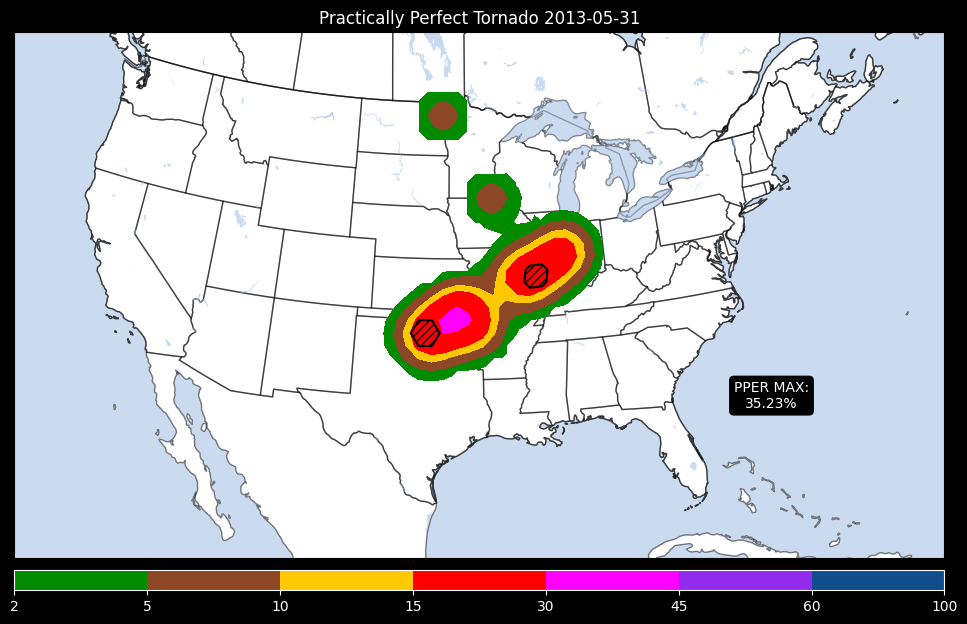

In [5]:
#just tor:

fig= plt.figure(facecolor= 'black', figsize= (12, 10))
ax = plt.subplot(1, 1, 1, projection= ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE, alpha= 0.5)
ax.add_feature(cfeature.BORDERS, alpha= 0.5)
ax.add_feature(cfeature.STATES, alpha= 0.5)
ax.add_feature(cfeature.LAKES, alpha= 0.5)
ax.add_feature(cfeature.OCEAN, alpha= 0.5)

ax.set_extent([-122, -67, 20, 50])


cf= ax.contourf(ds_tor_mask.lon, ds_tor_mask.lat, ds_tor_mask.p_perfect_tor, colors= colors, levels= levels, zorder= 11, transform= ccrs.PlateCarree())
ax.contour(ds_tor_sig_mask.lon, ds_tor_sig_mask.lat, ds_tor_sig_mask.p_perfect_sig_tor, levels= [10, 100], colors= 'black', zorder= 11, transform= ccrs.PlateCarree())
ax.contourf(ds_tor_sig_mask.lon, ds_tor_sig_mask.lat, ds_tor_sig_mask.p_perfect_sig_tor, levels= [10, 100], colors= 'none', zorder= 11, hatches= ['////'], transform= ccrs.PlateCarree())

ax.set_title(f'Practically Perfect Tornado {time_sel}', c= 'white')
plt.annotate(f'PPER MAX:\n{ds_tor_mask.p_perfect_tor.max().values.round(2)}%', va= 'center', ha= 'center', xy= (-75, 30), color= 'white', bbox= dict(boxstyle= 'round', fc= 'k'), transform= ccrs.PlateCarree())

cb= plt.colorbar(cf, orientation= 'horizontal', aspect = 45, pad = 0.015)
cb.ax.xaxis.set_tick_params(color= 'white', labelcolor= 'white')
cb.outline.set_edgecolor('white')